In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import pymongo
import datetime
import json
import base64
import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
consumer_key = "TqbTZEf7UL5yKuuIwNTFIR3sV"
consumer_secret = "bY3HtJfLi6hmBfaefRMSi8DQzNaIKdvIIJsAmDSLvwdkmoqSM0"
access_token = "4180437988-cKm4LNohEn1F7rY3DRIiPvGuaqAJdfQ6zuOhOsI"
access_token_secret = "Io9pva3uXQguf2P0w20p2aXbG70cXNuF6OSLrA2mwjHnZ"



MONGO_HOST= "mongodb://localhost:27017/"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print('Successful Authentication!!')
except:
    print('Failed authentication, check the credentials again.')

client = pymongo.MongoClient(MONGO_HOST)
db = client.twitter_db
collection = db.my_collection

Successful Authentication!!


In [3]:
#input parameters

hashtag = input('Please enter keyword or hashtag to search: ')
num = int(input ('Please enter how many tweets to analyze: '))

Please enter keyword or hashtag to search: abortion
Please enter how many tweets to analyze: 1000


In [3]:
# neg, pos, neutral, polarity=0


tweets = tweepy.Cursor(api.user_timeline, id="@JoeBiden",tweet_mode="extended", lang="en").items(400)    
for tweet in tweets:
    status = api.get_status(tweet.id)
    data={}
    data['id']= tweet.id
    data['created']=status.created_at
    data['geo']= tweet.geo
    data['text']=status.text
    data['likes']= status.favorite_count
    data['retweet']= status.retweet_count
    data['location'] = tweet.user.location
    collection.insert(data)
    
#     new_row = {'ID':tweet.id, 'Text':status.text, 'No. of likes':status.favorite_count, "Retweet count":status.retweet_count,'Date n time':status.created_at}
#     tweet_df = tweet_df.append(new_row,ignore_index=True)

Unexpected parameter: id
Unexpected parameter: lang
<ipython-input-3-59c99cc46ffc>:15: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  collection.insert(data)
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
U

In [4]:
tweets=[]
for c in collection.find():
    tweets.append(c)

tweet_df= pd.DataFrame(tweets)
    

In [5]:
tweet_df

,_id,id,created,geo,text,likes,retweet,location
0,62bde125953b13f253f58303,1542537210989355010,2022-06-30 15:55:04,None,We have to codify Roe vs. Wade into law. \n\nI...,27866,3914,"Washington, DC"
1,62bde125953b13f253f58304,1542275218407936006,2022-06-29 22:34:00,None,COVID-19 vaccinations are available for childr...,8132,1217,"Washington, DC"
2,62bde125953b13f253f58305,1542175058927435777,2022-06-29 15:56:00,None,My message to all LGBTQ+ youth: \n\nBe you. \n...,127924,14545,"Washington, DC"
3,62bde126953b13f253f58306,1541895969867980800,2022-06-28 21:27:00,None,RT @POTUS: Yesterday's loss of life in San Ant...,0,2654,"Washington, DC"
4,62bde126953b13f253f58307,1541076888495394817,2022-06-26 15:12:16,None,This is an extreme and dangerous path the Cour...,15335,2580,"Washington, DC"
...,...,...,...,...,...,...,...,...
1295,62bf2cdf12c8f0c5c94ddf65,1484262714130288648,2022-01-20 20:33:01,None,"One year ago, we started to write an American ...",12909,2395,"Washington, DC"
1296,62bf2cdf12c8f0c5c94ddf66,1484215137284333573,2022-01-20 17:23:58,None,I've never been more optimistic about America'...,5837,1108,"Washington, DC"
1297,62bf2cdf12c8f0c5c94ddf67,1484210869928144901,2022-01-20 17:07:01,None,RT @POTUS: 210 million Americans fully vaccina...,0,6204,"Washington, DC"
1298,62bf2ce012c8f0c5c94ddf68,1484198537306984451,2022-01-20 16:18:01,None,Our first year was the greatest year of job gr...,19023,2845,"Washington, DC"


In [6]:
nltk.download('stopwords')
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|@"," ",x)
remove_sp=lambda x:re.sub(' +', ' ', x)

tweet_df["Clean_text"] = tweet_df['text'].map(rt).map(remove_sp)
tweet_df["Clean_text"] = tweet_df['Clean_text'].str.lower()
tweet_df['Clean_text']= tweet_df['Clean_text'].apply(lambda x: x.strip())

tweet_df['Date']=tweet_df['created'].apply(lambda x: x.date())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinayaganesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
nltk.download('stopwords')
def clean_tweets(tweet):
    a= ''.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|@", " ", str(tweet).lower()).strip())
    return re.sub(' +', ' ', a)

tweet_df["Clean_text"] = tweet_df["text"].map(clean_tweets)
tweet_df["Date"]=tweet_df["created"].apply(lambda x: x.date())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinayaganesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
tweet_df

,_id,id,created,geo,text,likes,retweet,location,Clean_text,Date,polarity,subjectivity,Sentiment
0,62bde125953b13f253f58303,1542537210989355010,2022-06-30 15:55:04,None,We have to codify Roe vs. Wade into law. \n\nI...,27866,3914,"Washington, DC",we have to codify roe vs wade into law if the ...,2022-06-30,0.000000,0.000000,Neutral
1,62bde125953b13f253f58304,1542275218407936006,2022-06-29 22:34:00,None,COVID-19 vaccinations are available for childr...,8132,1217,"Washington, DC",covid 19 vaccinations are available for childr...,2022-06-29,0.466667,0.466667,Positive
2,62bde125953b13f253f58305,1542175058927435777,2022-06-29 15:56:00,None,My message to all LGBTQ+ youth: \n\nBe you. \n...,127924,14545,"Washington, DC",my message to all lgbtq youth be you you are l...,2022-06-29,0.350000,0.400000,Positive
3,62bde126953b13f253f58306,1541895969867980800,2022-06-28 21:27:00,None,RT @POTUS: Yesterday's loss of life in San Ant...,0,2654,"Washington, DC",rt yesterday s loss of life in san antonio is ...,2022-06-28,-0.100000,0.900000,Negative
4,62bde126953b13f253f58307,1541076888495394817,2022-06-26 15:12:16,None,This is an extreme and dangerous path the Cour...,15335,2580,"Washington, DC",this is an extreme and dangerous path the cour...,2022-06-26,-0.362500,0.950000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,62bf2cdf12c8f0c5c94ddf65,1484262714130288648,2022-01-20 20:33:01,None,"One year ago, we started to write an American ...",12909,2395,"Washington, DC",one year ago we started to write an american s...,2022-01-20,0.158333,0.366667,Neutral
1296,62bf2cdf12c8f0c5c94ddf66,1484215137284333573,2022-01-20 17:23:58,None,I've never been more optimistic about America'...,5837,1108,"Washington, DC",i ve never been more optimistic about america ...,2022-01-20,0.250000,0.312500,Neutral
1297,62bf2cdf12c8f0c5c94ddf67,1484210869928144901,2022-01-20 17:07:01,None,RT @POTUS: 210 million Americans fully vaccina...,0,6204,"Washington, DC",rt 210 million americans fully vaccinated 96 o...,2022-01-20,0.000000,0.500000,Neutral
1298,62bf2ce012c8f0c5c94ddf68,1484198537306984451,2022-01-20 16:18:01,None,Our first year was the greatest year of job gr...,19023,2845,"Washington, DC",our first year was the greatest year of job gr...,2022-01-20,0.362500,0.408333,Positive


In [11]:
# tokens =tweet_df['Tokens']
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False).generate(" ".join(tokens))
# plt.imshow(wc)

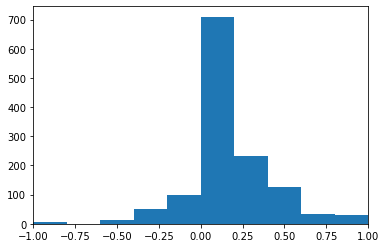

In [8]:
tweet_df[['polarity', 'subjectivity']] = tweet_df['Clean_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
plt.xlim(-1,1)
plt.hist(tweet_df['polarity'],bins=10)
plt.show()

In [9]:
filters = [(tweet_df.polarity <0),
         (tweet_df.polarity >=0)&(tweet_df.polarity<=0.25),
         (tweet_df.polarity >0.25)]
value=['Negative',"Neutral","Positive"]
tweet_df['Sentiment']=np.select(filters,value)

In [10]:
tweet_df['Sentiment']

0        Neutral
1       Positive
2       Positive
3       Negative
4       Negative
          ...   
1295     Neutral
1296     Neutral
1297     Neutral
1298    Positive
1299     Neutral
Name: Sentiment, Length: 1300, dtype: object

In [20]:
# COUNT NUMBER OF POSITIVE, NEGATIVE AND NEUTRAL TWEETS

neu_list = []
neg_list = []
pos_list = []
neu=0
pos=0
neg= 0
for i in range(len(tweet_df['Sentiment'])):
    if (tweet_df['Sentiment'][i]=='Neutral'):
        neu=neu+1
    elif (tweet_df['Sentiment'][i]=='Positive'):
        pos=pos+1
    else:
        neg=neg+1
def percent(a,total):
    b=100 * float(a)/float(total)
    return format(b,'.1f')

In [21]:
positive = percent(pos, 1300)
negative = percent(neg, 1300)
neutral = percent(neu, 1300)

In [22]:
negative

'13.2'

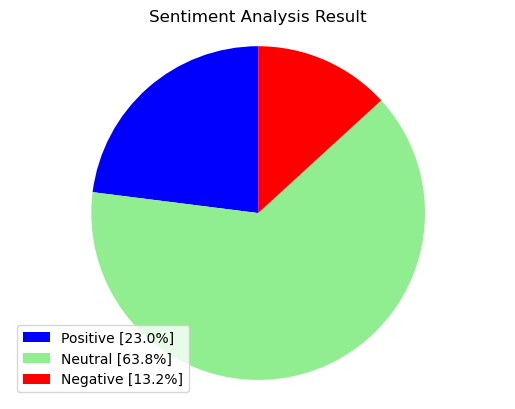

In [29]:
# PIE CHART FOR TWEETS

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['blue', 'lightgreen','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result')
plt.axis('equal')
plt.show()

In [34]:
# TWEETS WITH HASHTAG

tweet_lst=[]
geoc="38.9072,-77.0369,10mi"
for tweet in tweepy.Cursor(api.search_tweets,geocode=geoc, q="abortion").items(500):
    tweetDate = tweet.created_at.date()
    if(tweet.coordinates !=None):
        tweet_lst.append([tweetDate,tweet.id,tweet.coordinates['coordinates'][0],tweet.coordinates['coordinates'][1],tweet.user.screen_name,tweet.user.name, tweet.text,tweet.user._json["geo_enabled"]])

tweet_dfs = pd.DataFrame(tweet_lst, columns=['tweet_dt', 'id', 'lat','long','username', 'name', 'tweet','geo'])

In [35]:
tweet_dfs

,tweet_dt,id,lat,long,username,name,tweet,geo


/Users/abhinayaganesh/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: divide by zero encountered in double_scalars
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
/Users/abhinayaganesh/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:851: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 11

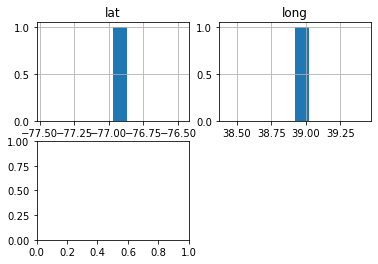

In [23]:
tweet_dfs[['lat','long','id']].hist();

In [15]:
tweet_lst

[]